<a href="https://colab.research.google.com/github/ajayks1974/learning/blob/master/fds/fds_wk11_visualization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set(color_codes=True)

#Tabulation

In [3]:
url = 'https://api.covid19india.org/states_daily.json'

In [4]:
import urllib.request

In [5]:
urllib.request.urlretrieve(url,'covid_data.json')

('covid_data.json', <http.client.HTTPMessage at 0x7f0efce90cf8>)

In [6]:
covid_data = pd.read_json('covid_data.json')

In [7]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
445,"{'an': '148', 'ap': '9097', 'ar': '52', 'as': ..."
446,"{'an': '0', 'ap': '97', 'ar': '0', 'as': '5', ..."
447,"{'an': '135', 'ap': '7665', 'ar': '76', 'as': ..."
448,"{'an': '61', 'ap': '6924', 'ar': '110', 'as': ..."


In [8]:
import json

In [9]:
with open('covid_data.json') as f:
    data = json.load(f)
data

{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl':

In [10]:
data = data['states_daily']

In [11]:
print(type(data))

<class 'list'>


In [12]:
covid_data = pd.json_normalize(data)

In [13]:
covid_data

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,148,9097,52,1734,2642,32,227,09-Aug-20,0,1225,28,193,1311,100,750,673,336,4670,970,8,0,13348,67,117,667,2,11,1543,459,147,1072,80,Recovered,1669,6020,92,54474,0,2817,171,1996
446,0,97,0,5,10,1,6,09-Aug-20,0,13,0,3,25,1,9,17,13,107,2,0,0,390,0,0,19,0,1,14,24,7,11,0,Deceased,12,119,4,1013,0,41,8,54
447,135,7665,76,2900,3021,80,477,10-Aug-20,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,Confirmed,1256,5914,62,53016,0,4113,389,2905
448,61,6924,110,1261,2824,100,208,10-Aug-20,0,1070,50,213,1138,24,711,750,372,5218,784,15,0,6711,8,78,654,25,69,1236,416,154,825,13,Recovered,1587,6037,267,47362,0,4074,167,3208


In [14]:
df = covid_data

In [15]:
df.date

0      14-Mar-20
1      14-Mar-20
2      14-Mar-20
3      15-Mar-20
4      15-Mar-20
         ...    
445    09-Aug-20
446    09-Aug-20
447    10-Aug-20
448    10-Aug-20
449    10-Aug-20
Name: date, Length: 450, dtype: object

In [16]:
df.date = pd.to_datetime(df.date)

In [17]:
df.date

0     2020-03-14
1     2020-03-14
2     2020-03-14
3     2020-03-15
4     2020-03-15
         ...    
445   2020-08-09
446   2020-08-09
447   2020-08-10
448   2020-08-10
449   2020-08-10
Name: date, Length: 450, dtype: datetime64[ns]

In [18]:
df = df[df.status == 'Confirmed']

In [19]:
df.drop('status', axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df.set_index('date', inplace=True)

In [21]:
df

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-06,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954
2020-08-07,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,61455,0,4404,278,2912
2020-08-08,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2020-03-14 to 2020-08-10
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      150 non-null    object
 1   ap      150 non-null    object
 2   ar      150 non-null    object
 3   as      150 non-null    object
 4   br      150 non-null    object
 5   ch      150 non-null    object
 6   ct      150 non-null    object
 7   dd      150 non-null    object
 8   dl      150 non-null    object
 9   dn      150 non-null    object
 10  ga      150 non-null    object
 11  gj      150 non-null    object
 12  hp      150 non-null    object
 13  hr      150 non-null    object
 14  jh      150 non-null    object
 15  jk      150 non-null    object
 16  ka      150 non-null    object
 17  kl      150 non-null    object
 18  la      150 non-null    object
 19  ld      150 non-null    object
 20  mh      150 non-null    object
 21  ml      150 non-null    object
 22  mn     

In [23]:
pd.to_numeric(df.tn)

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-08-06    5684
2020-08-07    5880
2020-08-08    5883
2020-08-09    5994
2020-08-10    5914
Name: tn, Length: 150, dtype: int64

In [24]:
df = df.apply(pd.to_numeric)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2020-03-14 to 2020-08-10
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      150 non-null    int64
 1   ap      150 non-null    int64
 2   ar      150 non-null    int64
 3   as      150 non-null    int64
 4   br      150 non-null    int64
 5   ch      150 non-null    int64
 6   ct      150 non-null    int64
 7   dd      150 non-null    int64
 8   dl      150 non-null    int64
 9   dn      150 non-null    int64
 10  ga      150 non-null    int64
 11  gj      150 non-null    int64
 12  hp      150 non-null    int64
 13  hr      150 non-null    int64
 14  jh      150 non-null    int64
 15  jk      150 non-null    int64
 16  ka      150 non-null    int64
 17  kl      150 non-null    int64
 18  la      150 non-null    int64
 19  ld      150 non-null    int64
 20  mh      150 non-null    int64
 21  ml      150 non-null    int64
 22  mn      150 non-null    int64
 

In [26]:
df.tail(7)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954
2020-08-07,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,61455,0,4404,278,2912
2020-08-08,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949
2020-08-09,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,62117,0,4571,230,2939
2020-08-10,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905


##Styling Tabulation

In [27]:
df_t = df.tail(7)

In [28]:
df_t.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,61455,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,62117,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905


In [29]:
def color_red_negative(x):
    color = 'red' if x < 100 else 'white'
    return 'color: ' + color

In [30]:
color_red_negative(-1)

'color: red'

In [31]:
df_t.style.applymap(color_red_negative)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,61455,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,62117,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905


In [32]:
df_t.style.highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,61455,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,62117,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905


In [33]:
df_t.drop('tt', axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
def bold_max_value(x):
    is_max = (x == x.max())
    return ['font-weight: bold' if y else ' ' for y in is_max]

In [35]:
df_t.style.apply(bold_max_value)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905


In [36]:
df_t.style.apply(bold_max_value).highlight_max(color='red',axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905


In [37]:
df_t.style.background_gradient(cmap='Reds',axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905


In [38]:
df_t.style.background_gradient(cmap='Reds',subset = ['mh', 'dl', 'tn'], axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905


In [39]:
df_t.style.bar()

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905


In [40]:
df_t.style.bar(subset = ['mh', 'dl', 'tn'])

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,0,4586,369,2954
2020-08-07 00:00:00,99,10171,101,2679,3646,47,388,0,1192,44,333,1074,103,751,726,473,6670,1251,19,0,10483,16,249,734,21,77,1833,1039,241,1161,25,2207,5880,128,0,4404,278,2912
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905


In [41]:
df_t[['mh', 'dl', 'tn']].style.bar(subset = ['mh'], color = 'red').bar(subset = ['tn'], color = 'orange').bar(subset = ['dl'], color = 'yellow')

,mh,dl,tn
date,,,
2020-08-04 00:00:00,7760,674,5063
2020-08-05 00:00:00,10309,1076,5175
2020-08-06 00:00:00,11514,1299,5684
2020-08-07 00:00:00,10483,1192,5880
2020-08-08 00:00:00,12822,1404,5883
2020-08-09 00:00:00,12248,1300,5994
2020-08-10 00:00:00,9181,707,5914


#Distribution of Data

## Distribution of Single Continuous Variable

### Histogram

In [42]:
x = np.random.normal(size=1000)

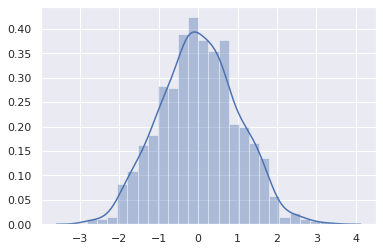

In [43]:
sns.distplot(x);

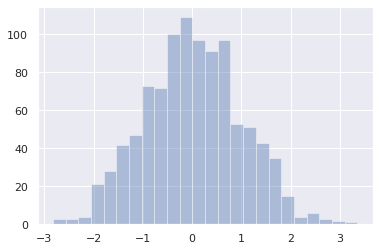

In [44]:
sns.distplot(x, kde=False);

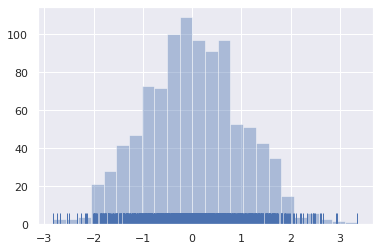

In [45]:
sns.distplot(x, kde=False, rug=True);

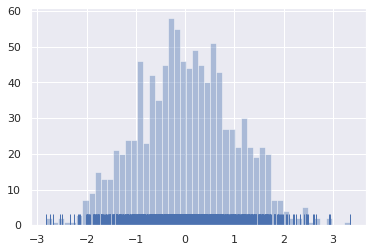

In [46]:
sns.distplot(x, kde=False, rug=True, bins=50);

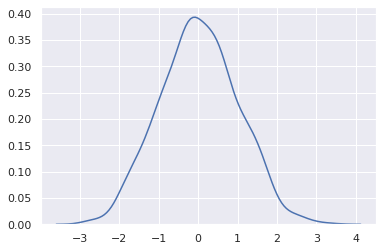

In [47]:
sns.kdeplot(x);

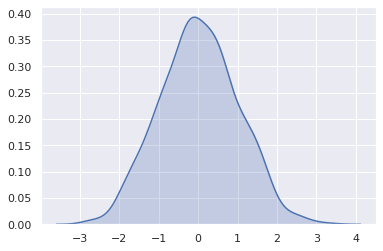

In [48]:
sns.kdeplot(x, shade=True);

In [49]:
y = np.random.uniform(size=1000)

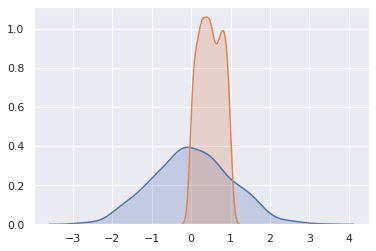

In [50]:
sns.kdeplot(x, shade=True);
sns.kdeplot(y, shade=True);

In [51]:
d = sns.load_dataset('diamonds')

In [52]:
print(type(d))

<class 'pandas.core.frame.DataFrame'>


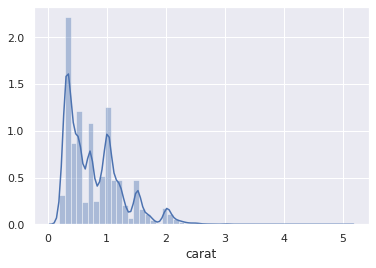

In [53]:
sns.distplot(d.carat)

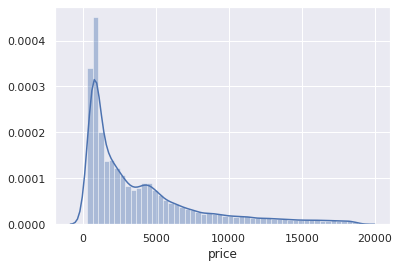

In [54]:
sns.distplot(d.price)

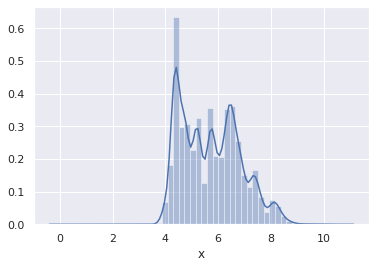

In [55]:
sns.distplot(d['x'])

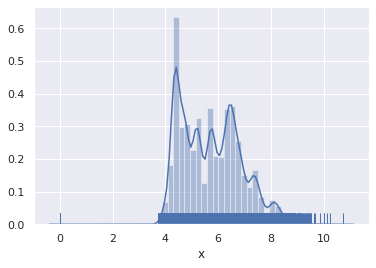

In [56]:
sns.distplot(d['x'], rug=True)

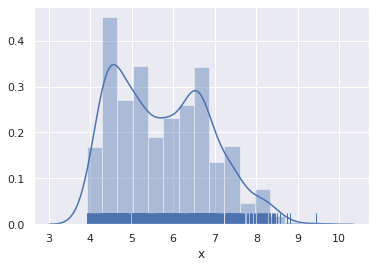

In [57]:
sns.distplot(d.sample(1000).x, rug=True)

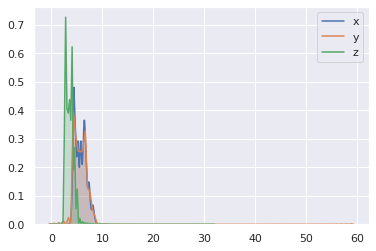

In [58]:
sns.kdeplot(d.x, shade=True)
sns.kdeplot(d.y, shade=True)
sns.kdeplot(d.z, shade=True)

### Boxplot

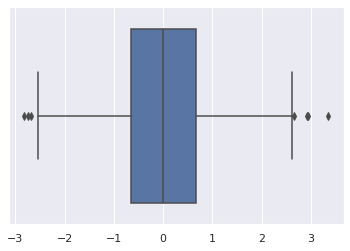

In [59]:
sns.boxplot(x)

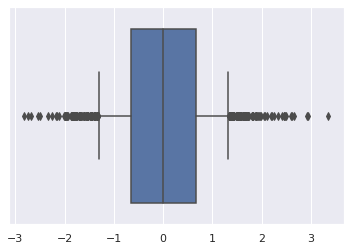

In [60]:
sns.boxplot(x, whis=0.5)

In [61]:
x = np.random.uniform(size=1000)

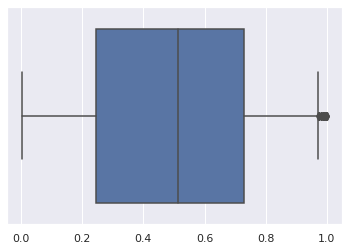

In [62]:
sns.boxplot(x, whis=0.5)

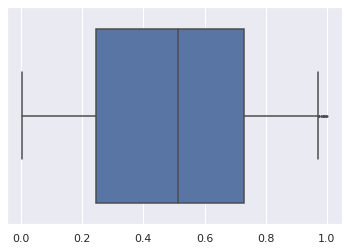

In [63]:
sns.boxplot(x, whis=0.5, fliersize=1)

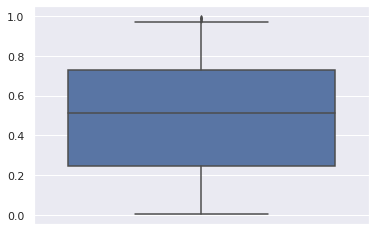

In [64]:
sns.boxplot(x, whis=0.5, fliersize=1, orient='v')

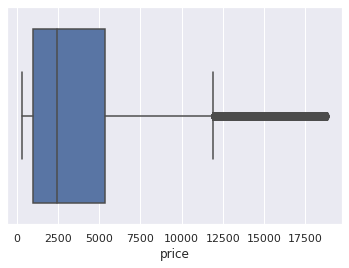

In [65]:
sns.boxplot(d.price)

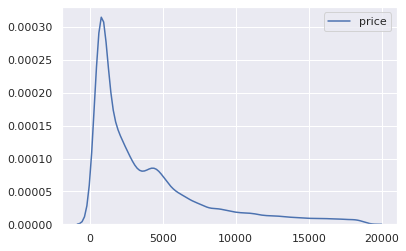

In [66]:
sns.kdeplot(d.price)

## Distribution of Categorical Data

## Bar plots

In [70]:
d.groupby('cut').count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [72]:
c = d.groupby('cut')['cut'].count()

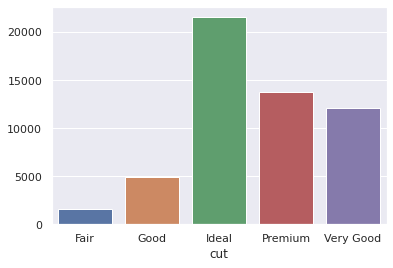

In [73]:
sns.barplot(x=c.index, y=c.values)

In [74]:
c = d.groupby('clarity')['clarity'].count()

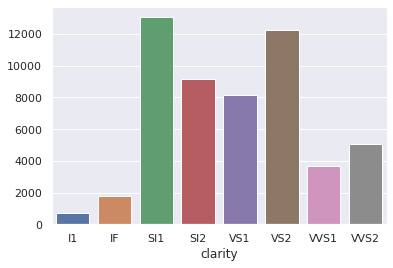

In [75]:
sns.barplot(x=c.index, y=c.values)

In [76]:
c = d.groupby('color')['color'].count()

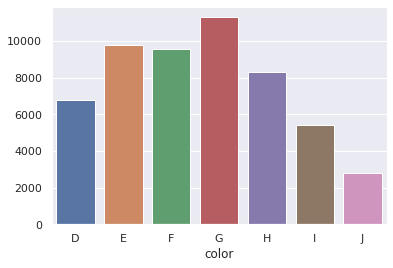

In [77]:
sns.barplot(x=c.index, y=c.values)